<a href="https://colab.research.google.com/github/MazenSalama/NLP_Text_Classification_With_ML/blob/master/NLP_Text_Classification_With_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Text Classification is one model of supervised machine learning task with a labelled dataset containing text documents and their labels is used for train a classifier.

# Steps : -

#1. Dataset Preparation: 
Dataset Preparation step which includes the process of loading a dataset and performing basic pre-processing. The dataset is then splitted into train and validation sets.


#2. Feature Engineering: 
Feature Engineering in which the raw dataset is transformed into flat features which can be used in a machine learning model. This step also includes the process of creating new features from the existing data.


#3. Model Training: 
Model Building step in which a machine learning model is trained on a labelled dataset.


#4. Improve Performance of Text Classifier: 
we will use different ways to improve the performance of text classifiers.

In [0]:
# libraries for dataset preparation, feature engineering, model training 

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras.layers import Input
import tensorflow
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

Using TensorFlow backend.


In [0]:
#!pip3 install --ignore-installed --upgrade https://github.com/lakshayg/tensorflow-build/releases/download/tf1.13.1-ubuntu16.04-py3/tensorflow-1.13.1-cp37-cp37m-macosx_10_9_x86_64.whl

#1. Dataset preparation


In [0]:
#loading the data set
df = pandas.read_csv('AtrialFibrillationOA-InterimExport_DATA_2019-08-19_1151.csv', delimiter = "|")
df = df.reindex(numpy.random.permutation(df.index))
df = df[['aggregated_phrase', 'oac_class']]

# filter out rows ina . dataframe with column oac_class values NA/NAN
df = df[df.oac_class.notnull()]
#drop unwanted 
#df = df[df.oac_class != 0]
#df = df[df.oac_class != 3]
#df = df[df.oac_class != 4]
#df = df[df.oac_class != 5]
#remove duplicates phrases
df = df.drop_duplicates(subset='aggregated_phrase', keep="last")


#group by valuse 
#df.groupby('oac_class').value()


In [0]:
#showing counts of each value
df.oac_class.value_counts()

2.0    521
3.0     28
1.0     25
5.0     22
4.0     14
0.0     12
Name: oac_class, dtype: int64

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


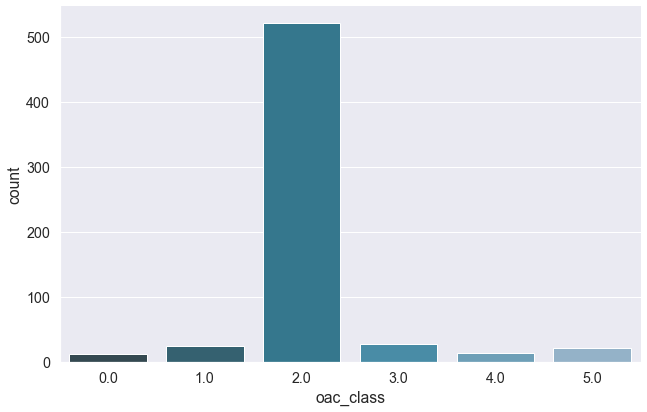

In [0]:
#Visually 
sns.factorplot(x="oac_class", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [0]:
# Now aggregate 
df.loc[df.oac_class == 0, 'oac_class1'] = '0' 
df.loc[df.oac_class == 1, 'oac_class1'] = '1' 
df.loc[df.oac_class == 2, 'oac_class1'] = '1'
df.loc[df.oac_class == 3, 'oac_class1'] = '0' 
df.loc[df.oac_class == 4, 'oac_class1'] = '0'
df.loc[df.oac_class == 5, 'oac_class1'] = '0' 


/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


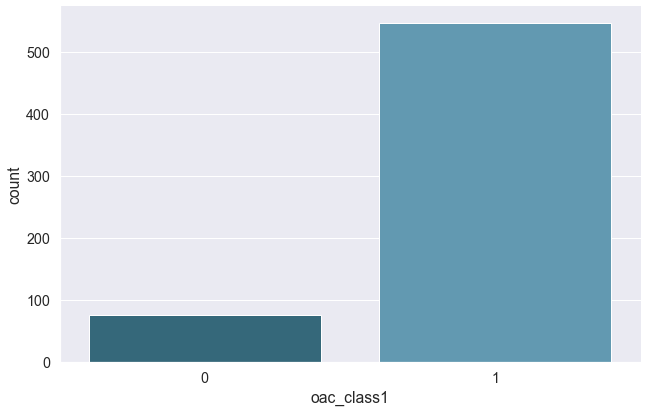

In [0]:
#Visually the new aggregated column
sns.factorplot(x="oac_class1", data=df, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [0]:
#count the value
df.oac_class1.value_counts()

1    546
0     76
Name: oac_class1, dtype: int64

In [0]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
#unpickled_df = pd.read_pickle("stop_words500.pkl")
#unpickled_df
##Creating a list of custom stopwords
new_words = ['and',
 'the',
 'of',
 'to',
 'with',
 'mg',
 'no',
 'is',
 'in',
 'for',
 'on',
 'patient',
 'he',
 'was',
 'or',
 'she',
 'history',
 '10',
 'at',
 'by',
 'has',
 'as',
 'daily',
 'this',
 '12',
 'his',
 'not',
 'normal',
 'her',
 'tablet',
 'that',
 'take',
 'pain',
 '11',
 'mouth',
 '15',
 'will',
 '16',
 'left',
 '17',
 'have',
 'time',
 '20',
 'right',
 'are',
 '14',
 'day',
 '30',
 'md',
 'date',
 'from',
 'had',
 'plan',
 'oral',
 'heart',
 'ml',
 'tab',
 'be',
 'up',
 'well',
 'we',
 '25',
 'last',
 'chest',
 'prn',
 'past',
 '24',
 'dl',
 'care',
 'negative',
 'medications',
 'today',
 'blood',
 'disease',
 'pt',
 'status',
 'an',
 'continue',
 '08',
 'po',
 '09',
 'but',
 'exam',
 'year',
 'medical',
 '40',
 '07',
 'any',
 'been',
 '2015',
 '2016',
 '50',
 '05',
 'dr',
 '06',
 'other',
 'physical',
 '100',
 '03',
 'reviewed',
 'follow',
 '13',
 'if',
 'there',
 'per',
 'rate',
 '01',
 'old',
 'note',
 'clinic',
 'atrial',
 '04',
 '2014',
 'times',
 'which',
 '02',
 'skin',
 '2017',
 'present',
 'visit',
 'every',
 'given',
 'mmol',
 'also',
 'hours',
 'medication',
 'units',
 'it',
 '18',
 'range',
 'use',
 'sodium',
 'days',
 'yes',
 'acute',
 'assessment',
 'were',
 'review',
 'discharge',
 'family',
 'kg',
 'needed',
 'without',
 'home',
 'edema',
 'after',
 '36',
 'bid',
 '26',
 'current',
 'value',
 'results',
 'symptoms',
 'denies',
 'therapy',
 'dose',
 'pulmonary',
 'chronic',
 'surgery',
 '00',
 'pressure',
 '22',
 'lower',
 'does',
 'back',
 '21',
 'hospital',
 'hypertension',
 'procedure',
 'neck',
 '60',
 'noted',
 '19',
 'total',
 'who',
 '23',
 'post',
 'systems',
 'fibrillation',
 'all',
 'ul',
 'am',
 'due',
 'general',
 'prior',
 'above',
 '28',
 'respiratory',
 'none',
 '27',
 'iv',
 'diagnosis',
 'intravenous',
 'chloride',
 'you',
 'failure',
 '2013',
 'breath',
 'social',
 'cardiac',
 '29',
 'some',
 'capsule',
 'weight',
 '2012',
 'diabetes',
 '90',
 'one',
 'type',
 'mcg',
 'potassium',
 'ct',
 'result',
 'surgical',
 'since',
 'may',
 'cardiovascular',
 'bp',
 'treatment',
 'tube',
 'discussed',
 'regular',
 'cancer',
 'glucose',
 'see',
 'when',
 'pulse',
 'sounds',
 'rhythm',
 'utah',
 'allergies',
 'intact',
 'than',
 'cm',
 'significant',
 'clear',
 'stable',
 'reports',
 'abdomen',
 'examination',
 'seen',
 'week',
 'mild',
 'extremities',
 'now',
 'following',
 'years',
 '2011',
 'admission',
 'about',
 'lab',
 'bilateral',
 'distress',
 'bowel',
 '31',
 'service',
 'hr',
 'temp',
 'taking',
 'attending',
 'ref',
 'provider',
 'name',
 'encounter',
 'recent',
 'information',
 '97',
 'new',
 'months',
 'university',
 'over',
 'performed',
 'male',
 'health',
 'signs',
 'soft',
 'artery',
 'mmhg',
 'changes',
 'would',
 'your',
 'illness',
 'weeks',
 'sleep',
 'currently',
 'calcium',
 'alert',
 'likely',
 '80',
 'renal',
 'findings',
 'inr',
 'insulin',
 '98',
 'abdominal',
 'low',
 'physician',
 'mr',
 'did',
 'oriented',
 '500',
 'more',
 'place',
 'once',
 'pm',
 'final',
 'ventricular',
 'imaging',
 'min',
 '81',
 'him',
 'labs',
 'non',
 'collection',
 'upper',
 'then',
 'increased',
 'bilaterally',
 'started',
 'female',
 'do',
 'function',
 'evidence',
 'coronary',
 'lb',
 'warfarin',
 'positive',
 'used',
 'diet',
 'head',
 'aspirin',
 'hcc',
 'multiple',
 'during',
 'showed',
 'primary',
 'change',
 'transplant',
 'resp',
 'active',
 'morning',
 'creatinine',
 'known',
 'agree',
 'problem',
 'age',
 'placement',
 '70',
 'lung',
 'spo2',
 'vitamin',
 'sig',
 'nausea',
 'two',
 '37',
 'however',
 'cardiology',
 'call',
 'file',
 'alcohol',
 'valve',
 'high',
 'states',
 'management',
 'decreased',
 'appears',
 'good',
 'monitor',
 'very',
 'level',
 '2010',
 'oxygen',
 'gi',
 'shortness',
 'eyes',
 'extremity',
 'start',
 'these',
 'further',
 'ago',
 'knee',
 '35',
 'vital',
 'personally',
 '75',
 'evaluation',
 'found',
 'mrn',
 'injection',
 'severe',
 'minutes',
 'infection',
 'systolic',
 'urine',
 'stroke',
 'bun',
 'fluid',
 'drug',
 'can',
 'bedtime',
 'before',
 'oz',
 'bleeding',
 '000',
 'tenderness',
 '200',
 'outpatient',
 'output',
 'data',
 'lungs',
 'ms',
 'out',
 'small',
 'activity',
 'coumadin',
 '72',
 'never',
 'night',
 'admitted',
 'risk',
 'dry',
 'medicine',
 'kidney',
 'possible',
 'resident',
 'sinus',
 'need',
 'wound',
 'point',
 'full',
 'hct',
 'elevated',
 '96',
 'comment',
 'improved',
 'most',
 '32',
 'leg',
 'intake',
 'swelling',
 'hour',
 'location',
 'eye',
 'including',
 'done',
 'cough',
 'moderate',
 'loss',
 'tablets',
 'wbc',
 'unit',
 'twice',
 'heent',
 'hgb',
 'aortic',
 '99',
 'presents',
 'report',
 'into',
 'problems',
 'instructions',
 'meq',
 'they',
 'secondary',
 'neurological',
 'only',
 'tobacco',
 'temporal',
 'light',
 'appropriate',
 'metoprolol',
 'cell',
 'cap',
 'acetaminophen',
 'heparin',
 'mass',
 'cath',
 'test',
 'lasix',
 'cont',
 'site',
 'questions',
 'off',
 'ii',
 'cc',
 'lesions',
 '45',
 'less',
 'side',
 'warm',
 'within',
 'examined',
 'please',
 'room',
 '0700',
 'rn',
 'infusion',
 'next',
 'like',
 'team']
stop_words = stop_words.union(new_words)

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words=stop_words,ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['aggregated_phrase'])

In [0]:
#showing the head of dataset
df.head()

,aggregated_phrase,oac_class,oac_class1,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,noun_count,verb_count,adj_count,adv_count,pron_count
3102,Recommendations/Notes: 1. A-fib on 30 day mon...,1.0,1,809,125,6.420635,29,30,5,56,12,10,6,3
4052,"200 mg tablet, 1 tablet daily. Take 2 tablets ...",2.0,1,131,26,4.851852,7,3,1,10,1,5,1,0
4003,-heparin gtt AC for potential cardioversion af...,1.0,1,627,76,8.142857,26,24,6,44,5,7,3,0
4098,Patient called and states she developed jaw pa...,2.0,1,971,177,5.455056,12,20,7,41,36,14,7,17
4234,Dispense Refill Warfarin Sodium 5 MG OR Ta...,2.0,1,77,15,4.812500,5,7,3,12,0,0,0,0


In [0]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['aggregated_phrase'], df['oac_class1'], test_size=0.3)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

# 2. Feature Engineering

In this step, raw text data will be transformed into feature vectors #and new features will be created using the existing dataset. We will implement the following different ideas in #order to obtain relevant features from our dataset.

#2.1 Count Vectors as features

#2.2 TF-IDF Vectors as features

Word level

N-Gram level

Character level

#2.3 Word Embeddings as features

#2.4 Text / NLP based features

#2.5 Topic Models as features

Lets look at the implementation of these ideas in detail.

#2.1 Count Vectors as features

Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.

In [0]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['aggregated_phrase'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

#2.2 TF-IDF Vectors as features

TF-IDF score represents the relative importance of a term in the document and the entire corpus. 

TF-IDF score is #composed by two terms: 

the first computes the normalized Term Frequency (TF), the second term is the Inverse #Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the #number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)

IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

TF-IDF Vectors can be generated at different levels of input tokens (words, characters, n-grams)

#a. Word Level TF-IDF : 
Matrix representing tf-idf scores of every term in different documents
    
#b. N-gram Level TF-IDF :
 N-grams are the combination of N terms together. This Matrix representing tf-idf scores of N-grams
    
#c. Character Level TF-IDF : 
Matrix representing tf-idf scores of character level n-grams in the corpus



In [0]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['aggregated_phrase'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df['aggregated_phrase'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df['aggregated_phrase'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

#2.3 Word Embeddings

A word embedding is a form of representing words and documents using a dense vector representation. The position of #a word within the vector space is learned from text and is based on the words that surround the word when it is #used. 

Word embeddings can be trained using the input corpus itself or can be generated using pre-trained word embeddings #such as Glove, FastText, and Word2Vec. Any one of them can be downloaded and used as transfer learning. 
Following snnipet shows how to use pre-trained word embeddings in the model.  steps:

#1 Loading the pretrained word embeddings

#2 Creating a tokenizer object

#3 Transforming text documents to sequence of tokens and pad them

#4 Create a mapping of token and their respective embeddings

In [0]:
# load the pre-trained word-embedding vectors 
embeddings_index = {}
for i, line in enumerate(open('300d-1M.vec')):
    values = line.split()
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(df['aggregated_phrase'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# create token-embedding mapping
embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#2.4 Text / NLP based features

A number of extra text based features can also be created which sometimes are helpful for improving text #classification models. Some examples are:

#Word Count of the documents – total number of words in the documents

#Character Count of the documents – total number of characters in the documents

#Average Word Density of the documents – average length of the words used in the documents

#Puncutation Count in the Complete Essay – total number of punctuation marks in the documents

#Upper Case Count in the Complete Essay – total number of upper count words in the documents

#Title Word Count in the Complete Essay – total number of proper case (title) words in the documents

#Frequency distribution of Part of Speech Tags:

#1 Noun Count

#2 Verb Count

#3 Adjective Count

#4 Adverb Count

#5 Pronoun Count

#These features are highly experimental ones and should be used according to the problem statement only.



In [0]:
df['char_count'] = df['aggregated_phrase'].apply(len)
df['word_count'] = df['aggregated_phrase'].apply(lambda x: len(x.split()))
df['word_density'] = df['char_count'] / (df['word_count']+1)
df['punctuation_count'] = df['aggregated_phrase'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
df['title_word_count'] = df['aggregated_phrase'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
df['upper_case_word_count'] = df['aggregated_phrase'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [0]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['aggregated_phrase'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['aggregated_phrase'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count'] = df['aggregated_phrase'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count'] = df['aggregated_phrase'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['aggregated_phrase'].apply(lambda x: check_pos_tag(x, 'pron'))


#2.5 Topic Models as features

Topic Modelling is a technique to identify the groups of words (called a topic) from a collection of documents that #contains best information in the collection. I have used Latent Dirichlet Allocation for generating Topic Modelling #Features. LDA is an iterative model which starts from a fixed number of topics. Each topic is represented as a #distribution over words, and each document is then represented as a distribution over topics. Although the tokens #themselves are meaningless, the probability distributions over words provided by the topics provide a sense of the #different ideas contained in the documents. One can read more about topic modelling here

#Lets see its implementation:

In [0]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = numpy.array(vocab)[numpy.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

#3. Model Building

The final step in the text classification framework is to train a classifier using the features created in the #previous step. There are many different choices of machine learning models which can be used to train a final model. #We will implement following different classifiers for this purpose:

#Naive Bayes Classifier

#Linear Classifier

#Support Vector Machine

#Bagging Models

#Boosting Models

#Shallow Neural Networks

#Deep Neural Networks

#Convolutional Neural Network (CNN)

#Long Short Term Modelr (LSTM)

#Gated Recurrent Unit (GRU)

#Bidirectional RNN

#Recurrent Convolutional Neural Network (RCNN)

#Other Variants of Deep Neural Networks

#Lets implement these models and understand their details. 


The following function is a utility function which can be #used to train a model. It accepts the classifier, feature_vector of training data, labels of training data and #feature vectors of valid data as inputs. Using these inputs, the model is trained and accuracy score is computed.



In [0]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)


#3.1 Naive Bayes
Implementing a naive bayes model using sklearn implementation with different features

Naive Bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among #predictors. A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to #the presence of any other feature

In [0]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("NB, CharLevel Vectors: ", accuracy)

#3.2 Linear Classifier (Logistic Regression)

Implementing a Linear Classifier (Logistic Regression)

Logistic regression measures the relationship between the categorical dependent variable and one or more independent #variables by estimating probabilities using a logistic/sigmoid function.

In [0]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)

#3.3 Implementing a SVM Model
Support Vector Machine (SVM) is a supervised machine learning algorithm which is used for both classification or #regression challenges. 
The model extracts a best possible hyper-plane / line that segregates the two classes.

In [0]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, N-Gram Vectors: ", accuracy)

#3.4 Bagging Model
#Implementing a Random Forest Model

Random Forest models are a type of ensemble models, particularly bagging models. They are part of the tree based #model family.

In [0]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy)


#3.5 Boosting Model
Implementing Xtereme Gradient Boosting Model

Boosting models are another type of ensemble models part of tree based models. 

Boosting is a machine learning #ensemble meta-algorithm to reduce bias, and also variance in supervised learning, 

It is a family of #machine learning algorithms that convert weak learners to strong ones.

 A weak learner is defined to be a classifier #that is only slightly correlated with the true classification (it can label examples better than random guessing).

In [0]:
# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print ("Xgb, Count Vectors: ", accuracy)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print ("Xgb, CharLevel Vectors: ", accuracy)

#3.6 Shallow Neural Networks
Neural network is a mathematical model that is designed to behave similar to biological neurons and the nervous system. 

These models are used to recognize complex patterns and relationships that exists within a labelled data.

The shallow neural network contains mainly three types of layers 

 - Input layer

 - Hidden layer
 
 -Output layer

In [0]:
def create_model_architecture(input_size):
    # create input layer 
    input_layer = layers.Input((input_size, ), sparse=True)
    
    # create hidden layer
    hidden_layer = layers.Dense(100, activation="relu")(input_layer)
    
    # create output layer
    output_layer = layers.Dense(1, activation="sigmoid")(hidden_layer)

    classifier = models.Model(inputs = input_layer, outputs = output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    return classifier 

classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
accuracy = train_model(classifier, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, is_neural_net=True)
print ("NN, Ngram Level TF IDF Vectors",  accuracy)

#3.7 Deep Neural Networks

Deep Neural Networks are more complex neural networks in which the hidden layers performs extrem and more complex #operations than the simple sigmoid or relu activations.

 Different types of deep learning models can be applied in text #classification problems.

In [0]:
def create_cnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_cnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("CNN, Word Embeddings",  accuracy)


Epoch 1/1
435/435 [==============================] - 0s 1ms/step - loss: 0.3918
CNN, Word Embeddings 0.12834224598930483


#3.7.1 Convolutional Neural Network

In the Convolutional neural networks, convolutions over the input layer are used to compute the output.

This results in #local connections, where each region of the input is connected to a neuron in the output. Each layer applies #different filters and combines their results.

In [0]:
def create_cnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_cnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("CNN, Word Embeddings",  accuracy)

#3.7.2 Recurrent Neural Network – LSTM

Feed-forward neural networks in which activation outputs are propagated only in one direction, the activation #outputs from neurons propagate in both directions (from inputs to outputs and from outputs to inputs) in Recurrent #Neural Networks. Which creates loops in the neural network architecture which acts as a ‘memory state’ of the neurons. This state #allows the neurons an ability to remember what have been learned so far.

The memory state in RNNs gives an advantage over traditional neural networks but a problem called Vanishing Gradient #is associated with them. In this problem, while learning with a large number of layers, it becomes really hard for #the network to learn and tune the parameters of the earlier layers. 

To address this problem, A new type of RNNs called LSTMs (Long Short Term Memory) Models have been developed.

In [0]:
 def create_rnn_lstm():

    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.LSTM(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rnn_lstm()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("RNN-LSTM, Word Embeddings",  accuracy)

Epoch 1/1
348/348 [==============================] - 1s 4ms/step - loss: 0.5817
RNN-LSTM, Word Embeddings 0.08666666666666667


#3.7.3 Recurrent Neural Network – GRU

The Gated Recurrent Units are another form of recurrent neural networks.We will  add a layer of GRU instead of LSTM in our network.

In [0]:
def create_rnn_gru():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the GRU Layer
    lstm_layer = layers.GRU(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rnn_gru()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("RNN-GRU, Word Embeddings",  accuracy)

#3.7.4 Bidirectional RNN
RNN layers can be wrapped in Bidirectional layers as well. 

In [0]:
def create_bidirectional_rnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.Bidirectional(layers.GRU(100))(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_bidirectional_rnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("RNN-Bidirectional, Word Embeddings",  accuracy)

Epoch 1/1
348/348 [==============================] - 2s 5ms/step - loss: 0.5728
RNN-Bidirectional, Word Embeddings 0.08666666666666667


#3.7.5 Recurrent Convolutional Neural Network

As the essential architectures have been tried out, We can try different variants of these layers such as recurrent convolutional neural network. Another variants can be:

-Hierarichial Attention Networks

-Sequence to Sequence Models with Attention

-Bidirectional Recurrent Convolutional Neural Networks

-CNNs and RNNs with more number of layers

In [0]:
def create_rcnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)
    
    # Add the recurrent layer
    rnn_layer = layers.Bidirectional(layers.GRU(50, return_sequences=True))(embedding_layer)
    
    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rcnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("CNN, Word Embeddings",  accuracy)


Epoch 1/1
348/348 [==============================] - 1s 2ms/step - loss: 0.4928
CNN, Word Embeddings 0.08666666666666667


In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

def calculate_diagnostic_performance (actual_predicted):
    """ Calculate diagnostic performance.
    
    Takes a Numpy array of 1 and zero, two columns: actual and predicted
    
    Note that some statistics are repeats with different names
    (precision = positive_predictive_value and recall = sensitivity).
    Both names are returned
    
    Returns a dictionary of results:
        
    1) accuracy: proportion of test results that are correct    
    2) sensitivity: proportion of true +ve identified
    3) specificity: proportion of true -ve identified
    4) positive likelihood: increased probability of true +ve if test +ve
    5) negative likelihood: reduced probability of true +ve if test -ve
    6) false positive rate: proportion of false +ves in true -ve patients
    7) false negative rate:  proportion of false -ves in true +ve patients
    8) positive predictive value: chance of true +ve if test +ve
    9) negative predictive value: chance of true -ve if test -ve
    10) precision = positive predictive value 
    11) recall = sensitivity
    12) f1 = (2 * precision * recall) / (precision + recall)
    13) positive rate = rate of true +ve (not strictly a performance measure)
    """
    y = actual_predicted[:, 0]
    y_pred = actual_predicted[:, 1]
    CM = metrics.confusion_matrix(y, y_pred)
    TN=CM[0][0]
    FN=CM[1][0]
    FP=CM[0][1]
    TP=CM[1][1]
    accuracy = (TP+TN)*1.0/(TP+TN+FP+FN)
    PPV = TP*1.0/(TP+FP)
    NPV = TN*1.0/(TN+FN)
    sensitivity = TP*1.0/(TP+FN)
    specificity = TN*1.0/(FP+TN)
    fscore = 2.0*((sensitivity*PPV)/(sensitivity + PPV))

    # Calculate results
    positive_likelihood = sensitivity / (1 - specificity)
    negative_likelihood = (1 - sensitivity) / specificity

    false_positive_rate = 1 - specificity
    false_negative_rate = 1 - sensitivity

    precision = PPV
    recall = sensitivity

    positive_rate = np.mean(actual_predicted[:,1])

    # Add results to dictionary
    performance = {}
    performance['accuracy'] = accuracy
    performance['sensitivity'] = sensitivity
    performance['specificity'] = specificity
    performance['positive_likelihood'] = positive_likelihood
    performance['negative_likelihood'] = negative_likelihood
    performance['false_positive_rate'] = false_positive_rate
    performance['false_negative_rate'] = false_negative_rate
    performance['positive_predictive_value'] = PPV
    performance['negative_predictive_value'] = NPV
    performance['precision'] = precision
    performance['recall'] = recall
    performance['f1'] = fscore
    performance['positive_rate'] = positive_rate

    return performance

In [0]:
def load_data ():
    """Load the data set. Here we load the Breast Cancer Wisconsin (Diagnostic)
    Data Set. Data could be loaded from other sources though the structure
    should be compatible with thi sdata set, that is an object with the 
    following attribtes:
        .data (holds feature data)
        .feature_names (holds feature titles)
        .target_names (holds outcome classification names)
        .target (holds classification as zero-based number)
        .DESCR (holds text-based description of data set)"""
    
    data_set = datasets.load_breast_cancer()
    return data_set

def normalise (X_train,X_test):
    """Normalise X data, so that training set has mean of zero and standard
    deviation of one"""
    
    # Initialise a new scaling object for normalising input data
    sc=StandardScaler() 
    # Set up the scaler just on the training set
    sc.fit(X_train)
    # Apply the scaler to the training and test sets
    X_train_std=sc.transform(X_train)
    X_test_std=sc.transform(X_test)
    return X_train_std, X_test_std


def print_diagnostic_results (performance):
    """Iterate through, and print, the performance metrics dictionary"""
    
    print('\nMachine learning diagnostic performance measures:')
    print('-------------------------------------------------')
    for key, value in performance.items():
        print (key,'= %0.3f' %value) # print 3 decimal places
    return

def split_data (data_set, split=0.25):
    """Extract X and y data from data_set object, and split into tarining and
    test data. Split defaults to 75% training, 25% test if not other value 
    passed to function"""
    
    X=data_set.data
    y=data_set.target
    X_train,X_test,y_train,y_test=train_test_split(
        X,y,test_size=split, random_state=0)
    return X_train,X_test,y_train,y_test

def test_model(model, X, y):
    """Return predicted y given X (attributes)"""
    
    y_pred = model.predict(X)
    test_results = np.vstack((y, y_pred)).T
    return test_results

def train_model (X, y):
    """Train the model """
    
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(C=100,random_state=0)
    model.fit(X, y)
    return model

###### Main code #######

# Load data
data_set = load_data()

# Split data into training and test sets
X_train,X_test,y_train,y_test = split_data(data_set, 0.25)

# Normalise data
X_train_std, X_test_std = normalise(X_train,X_test)

# Train model
model = train_model(X_train_std,y_train)

# Produce results for test set
test_results = test_model(model, X_test_std, y_test)

# Measure performance of test set predictions
performance = calculate_diagnostic_performance(test_results)

# Print performance metrics
print_diagnostic_results(performance)